## 2. Custom layers

### 2.1. Custom Dense Layers

In [23]:
# fashion_mnist
import tensorflow as tf
from tensorflow import keras
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = x_train.reshape(60000, -1)
x_test  = x_test.reshape(10000, -1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [24]:
# data normalization

mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

In [25]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]),
                                         self.num_outputs])
    self.bias = self.add_weight("bias",
                                shape=[self.num_outputs])
    
  def call(self, inputs):
    return tf.matmul(inputs, self.kernel) + self.bias

In [26]:
# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(MyDenseLayer(256))
model.add(tf.keras.layers.ReLU())
model.add(MyDenseLayer(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_layer_4 (MyDenseLa  (None, 256)              200960    
 yer)                                                            
                                                                 
 re_lu_2 (ReLU)              (None, 256)               0         
                                                                 
 my_dense_layer_5 (MyDenseLa  (None, 10)               2570      
 yer)                                                            
                                                                 
 softmax_2 (Softmax)         (None, 10)                0         
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [27]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.8344 - sparse_categorical_accuracy: 0.7196 - val_loss: 0.6202 - val_sparse_categorical_accuracy: 0.7882 - 704ms/epoch - 3ms/step
Epoch 2/100
235/235 - 1s - loss: 0.5534 - sparse_categorical_accuracy: 0.8099 - val_loss: 0.5418 - val_sparse_categorical_accuracy: 0.8128 - 531ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 0.4974 - sparse_categorical_accuracy: 0.8275 - val_loss: 0.5091 - val_sparse_categorical_accuracy: 0.8252 - 513ms/epoch - 2ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4665 - sparse_categorical_accuracy: 0.8378 - val_loss: 0.4852 - val_sparse_categorical_accuracy: 0.8304 - 523ms/epoch - 2ms/step
Epoch 5/100
235/235 - 1s - loss: 0.4454 - sparse_categorical_accuracy: 0.8454 - val_loss: 0.4692 - val_sparse_categorical_accuracy: 0.8355 - 505ms/epoch - 2ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4299 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.4562 - val_sparse_categorical_accuracy: 0.8382 - 513ms/epoch - 2ms/step
Epoch 7/100
235/

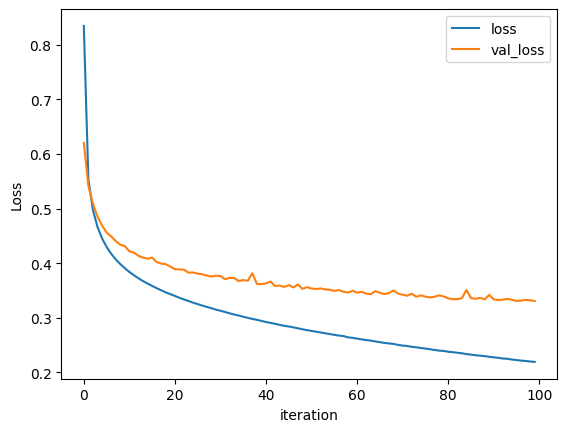

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

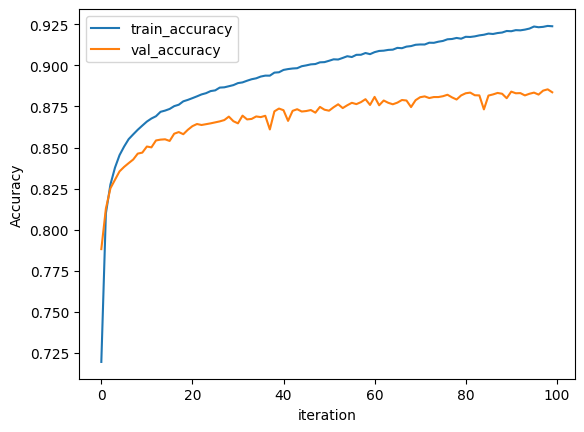

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### 2.2. Custom Activation Layers

In [30]:
class MyActivationLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(MyActivationLayer, self).__init__()

    def call(self, inputs):
        return tf.maximum(inputs, 0)

In [31]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256))
model.add(MyActivationLayer())
model.add(keras.layers.Dense(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 my_activation_layer (MyActi  (None, 256)              0         
 vationLayer)                                                    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
 softmax_3 (Softmax)         (None, 10)                0         
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [32]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.8214 - sparse_categorical_accuracy: 0.7224 - val_loss: 0.6201 - val_sparse_categorical_accuracy: 0.7826 - 759ms/epoch - 3ms/step
Epoch 2/100
235/235 - 1s - loss: 0.5577 - sparse_categorical_accuracy: 0.8076 - val_loss: 0.5441 - val_sparse_categorical_accuracy: 0.8081 - 528ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 0.5034 - sparse_categorical_accuracy: 0.8246 - val_loss: 0.5118 - val_sparse_categorical_accuracy: 0.8167 - 531ms/epoch - 2ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4720 - sparse_categorical_accuracy: 0.8346 - val_loss: 0.4931 - val_sparse_categorical_accuracy: 0.8245 - 522ms/epoch - 2ms/step
Epoch 5/100
235/235 - 1s - loss: 0.4508 - sparse_categorical_accuracy: 0.8428 - val_loss: 0.4780 - val_sparse_categorical_accuracy: 0.8287 - 531ms/epoch - 2ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4346 - sparse_categorical_accuracy: 0.8485 - val_loss: 0.4614 - val_sparse_categorical_accuracy: 0.8346 - 528ms/epoch - 2ms/step
Epoch 7/100
235/

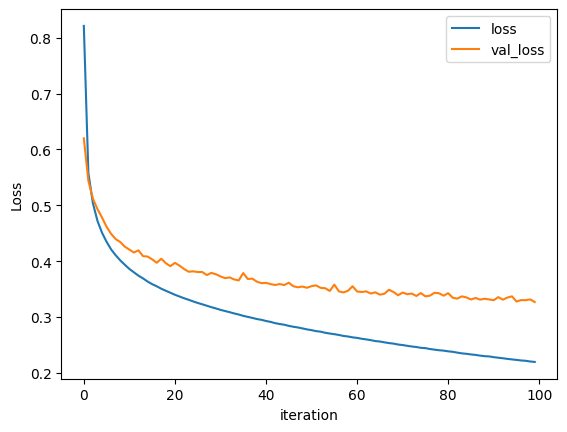

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

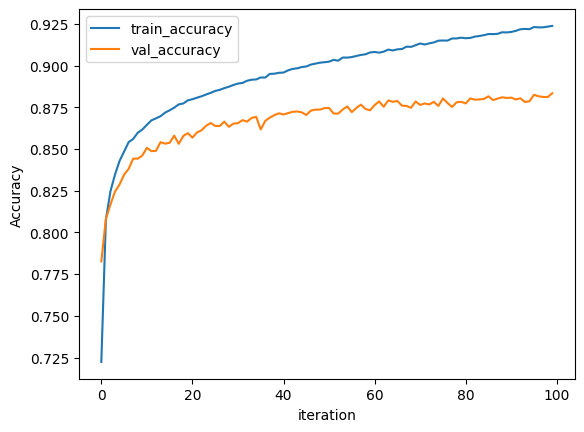

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

### 2.3. Hợp cả 2

In [35]:
class MyReluActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(MyReluActivation, self).__init__()

    def call(self, inputs):
        return tf.maximum(inputs, 0)

In [36]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                      shape=[int(input_shape[-1]), self.num_outputs])
        self.bias   = self.add_weight("bias",
                                      shape=[self.num_outputs])

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel) + self.bias

In [37]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(MyDenseLayer(256))
model.add(MyActivationLayer())
model.add(MyDenseLayer(10))
model.add(tf.keras.layers.Softmax())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_dense_layer_6 (MyDenseLa  (None, 256)              200960    
 yer)                                                            
                                                                 
 my_activation_layer_1 (MyAc  (None, 256)              0         
 tivationLayer)                                                  
                                                                 
 my_dense_layer_7 (MyDenseLa  (None, 10)               2570      
 yer)                                                            
                                                                 
 softmax_4 (Softmax)         (None, 10)                0         
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
________________________________________________

In [38]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=100, verbose=2)

Epoch 1/100
235/235 - 1s - loss: 0.7944 - sparse_categorical_accuracy: 0.7334 - val_loss: 0.6082 - val_sparse_categorical_accuracy: 0.7853 - 752ms/epoch - 3ms/step
Epoch 2/100
235/235 - 0s - loss: 0.5452 - sparse_categorical_accuracy: 0.8105 - val_loss: 0.5381 - val_sparse_categorical_accuracy: 0.8098 - 494ms/epoch - 2ms/step
Epoch 3/100
235/235 - 1s - loss: 0.4941 - sparse_categorical_accuracy: 0.8275 - val_loss: 0.5069 - val_sparse_categorical_accuracy: 0.8206 - 556ms/epoch - 2ms/step
Epoch 4/100
235/235 - 1s - loss: 0.4660 - sparse_categorical_accuracy: 0.8373 - val_loss: 0.4859 - val_sparse_categorical_accuracy: 0.8288 - 575ms/epoch - 2ms/step
Epoch 5/100
235/235 - 1s - loss: 0.4461 - sparse_categorical_accuracy: 0.8450 - val_loss: 0.4697 - val_sparse_categorical_accuracy: 0.8323 - 536ms/epoch - 2ms/step
Epoch 6/100
235/235 - 1s - loss: 0.4312 - sparse_categorical_accuracy: 0.8502 - val_loss: 0.4605 - val_sparse_categorical_accuracy: 0.8360 - 537ms/epoch - 2ms/step
Epoch 7/100
235/

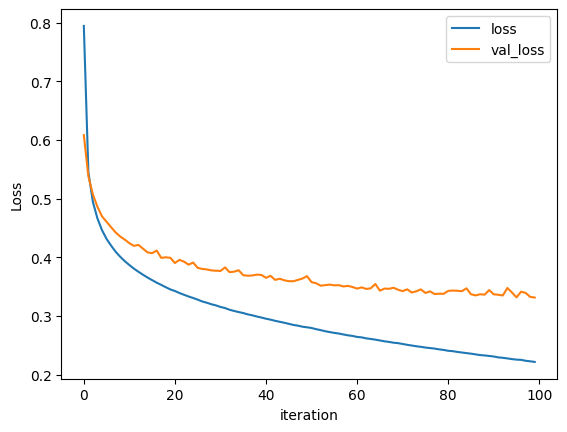

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

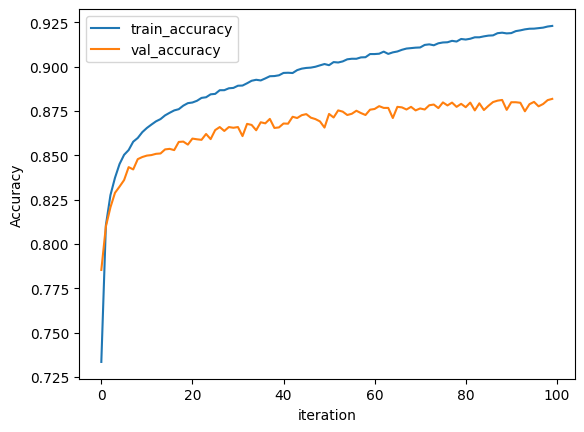

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [41]:
model.evaluate(x_test, y_test, 256)

40/40 [==============================] - 0s 1ms/step - loss: 0.3314 - sparse_categorical_accuracy: 0.8818


[0.33141016960144043, 0.8817999958992004]